### *Importing Required Libraries*

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
import csv
from tkinter import filedialog

### *Step 1: Data Collection & EDA*


Descriptive Statistics:
        Item ID   Quantity       Price
count  20.00000  20.000000   20.000000
mean   10.50000  24.900000  212.790000
std     5.91608  17.654282  240.886433
min     1.00000   5.000000   25.990000
25%     5.75000  13.750000   57.490000
50%    10.50000  20.000000  139.990000
75%    15.25000  30.000000  224.990000
max    20.00000  70.000000  999.990000


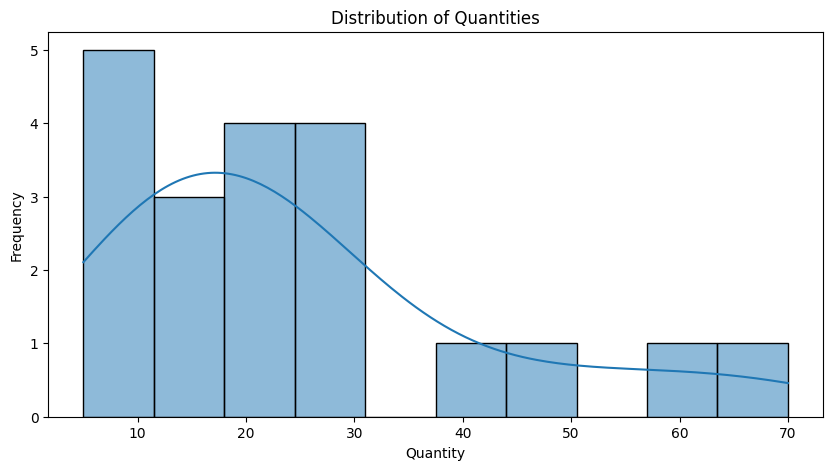

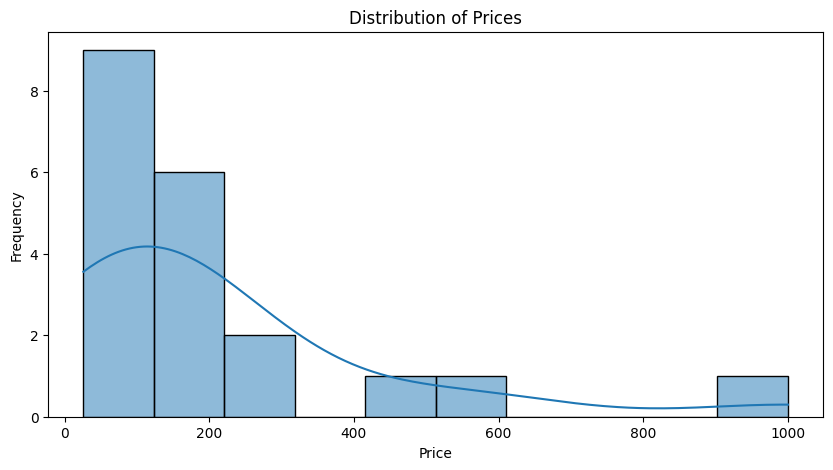

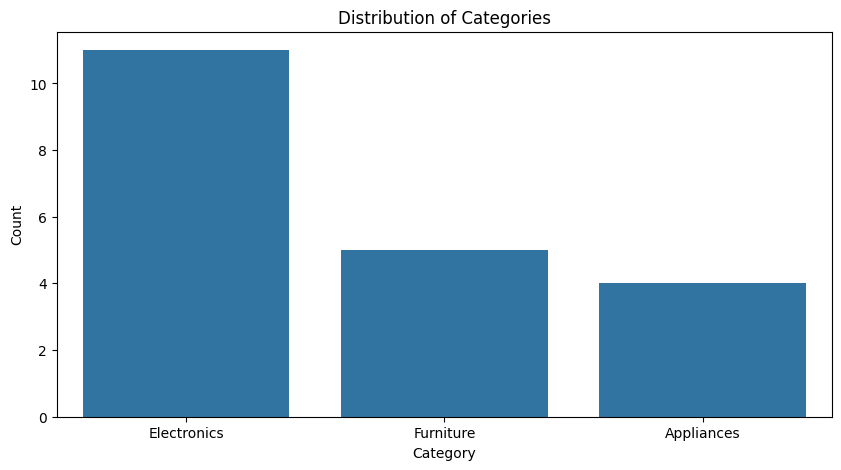

In [7]:
# Creating the sample dataset
data = {
    'Item ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Item Name': [
        'Laptop', 'Smartphone', 'Office Chair', 'Desk Lamp', 'Monitor', 
        'Keyboard', 'Mouse', 'Webcam', 'Desk', 'Headphones', 
        'Printer', 'Coffee Maker', 'Microwave', 'Bookcase', 'Router', 
        'Smartwatch', 'Blender', 'Standing Desk', 'Tablet', 'Electric Kettle'
    ],
    'Quantity': [10, 25, 15, 30, 20, 50, 70, 40, 10, 60, 15, 25, 10, 5, 30, 20, 15, 8, 18, 22],
    'Price': [
        999.99, 599.99, 199.99, 29.99, 149.99, 
        49.99, 25.99, 89.99, 299.99, 79.99, 
        149.99, 99.99, 129.99, 199.99, 59.99, 
        199.99, 49.99, 499.99, 299.99, 39.99
    ],
    'Category': [
        'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Electronics', 
        'Electronics', 'Electronics', 'Electronics', 'Furniture', 'Electronics', 
        'Electronics', 'Appliances', 'Appliances', 'Furniture', 'Electronics', 
        'Electronics', 'Appliances', 'Furniture', 'Electronics', 'Appliances'
    ]
}

# Exploratory Data Analysis
inventory_df = pd.DataFrame(data)
print("\nDescriptive Statistics:")
print(inventory_df.describe())

plt.figure(figsize=(10, 5))
sns.histplot(inventory_df['Quantity'], bins=10, kde=True)
plt.title('Distribution of Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(inventory_df['Price'], bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=inventory_df)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#### *Insights Gain From EDA*

- Quantity: The standard deviation is 16.59, indicating significant variation in stock quantities across different items.
- Pricing: There is a significant variation in item prices, with a concentration of lower-priced items. This indicates a diverse inventory with both affordable and high-end items.
- Quantity Distribution: The distribution is right-skewed, with a larger number of items having lower quantities.
- Price Distribution: This distribution is also right-skewed, with most items priced below $200.
- Category Distribution: Electronics dominate the inventory, followed by appliances and furniture. This could reflect the company prioritizes maximizing resource efficiency.

### *Step 2: Feature Engineering*

#### *Reason of Choosing Class based data structure*
- I chose a class-based data structure for feature engineering because it organizes the inventory items logically and allows for easy expansion, ensuring each item has consistent properties and methods for operations.

In [8]:
# Defining a class to represent each inventory item
class InventoryItem:
    def __init__(self, item_id, item_name, quantity, price, category):
        # Initialize the attributes for each inventory item
        self.item_id = item_id
        self.item_name = item_name
        self.quantity = quantity
        self.price = price
        self.category = category
    
    def update(self, item_name=None, quantity=None, price=None, category=None):
        if item_name is not None:
            self.item_name = item_name
        if quantity is not None:
            self.quantity = quantity
        if price is not None:
            self.price = price
        if category is not None:
            self.category = category
    
    def __repr__(self):
        return f"InventoryItem({self.item_id}, {self.item_name}, {self.quantity}, {self.price}, {self.category})"

# Defining a class to manage the inventory
class Inventory:
    def __init__(self):
        # Initialize an empty dictionary to store items
        self.items = {}
    
    def add_item(self, item):
        if item.item_id in self.items:
            raise ValueError("Item ID already exists.")
        self.items[item.item_id] = item
    
    def remove_item(self, item_id):
        if item_id not in self.items:
            raise ValueError("Item ID does not exist.")
        del self.items[item_id]
    
    # With Kwargs, the user can update multiple features of record at a time.
    def update_item(self, item_id, **kwargs):
        if item_id not in self.items:
            raise ValueError("Item ID does not exist.")
        self.items[item_id].update(**kwargs)
    
    # With Kwargs, the user can search for the item with any key feature.
    def search_item(self, **kwargs):
        results = []
        for item in self.items.values():
            match = True
            for key, value in kwargs.items():
                if getattr(item, key) != value:
                    match = False
                    break
            if match:
                results.append(item)
        return results

    def __repr__(self):
        return f"Inventory({self.items})"

# Initialize inventory and add sample data
inventory = Inventory()
for i in range(len(data['Item ID'])):
    item = InventoryItem(
        data['Item ID'][i],
        data['Item Name'][i],
        data['Quantity'][i],
        data['Price'][i],
        data['Category'][i]
    )
    inventory.add_item(item)

# Display the initialized inventory
print("Initialized Inventory:")
print(inventory)

Initialized Inventory:
Inventory({1: InventoryItem(1, Laptop, 10, 999.99, Electronics), 2: InventoryItem(2, Smartphone, 25, 599.99, Electronics), 3: InventoryItem(3, Office Chair, 15, 199.99, Furniture), 4: InventoryItem(4, Desk Lamp, 30, 29.99, Furniture), 5: InventoryItem(5, Monitor, 20, 149.99, Electronics), 6: InventoryItem(6, Keyboard, 50, 49.99, Electronics), 7: InventoryItem(7, Mouse, 70, 25.99, Electronics), 8: InventoryItem(8, Webcam, 40, 89.99, Electronics), 9: InventoryItem(9, Desk, 10, 299.99, Furniture), 10: InventoryItem(10, Headphones, 60, 79.99, Electronics), 11: InventoryItem(11, Printer, 15, 149.99, Electronics), 12: InventoryItem(12, Coffee Maker, 25, 99.99, Appliances), 13: InventoryItem(13, Microwave, 10, 129.99, Appliances), 14: InventoryItem(14, Bookcase, 5, 199.99, Furniture), 15: InventoryItem(15, Router, 30, 59.99, Electronics), 16: InventoryItem(16, Smartwatch, 20, 199.99, Electronics), 17: InventoryItem(17, Blender, 15, 49.99, Appliances), 18: InventoryItem(

### *Step 3: System Design, Development & Data Persistency*

#### *Reason of Choosing CSV to ensure Data Persistency*
- I used the CSV option for saving and loading the inventory state bacause it is easier to manipulate manually because it's a simple, comma-separated text format, making it straightforward for users to edit and review in spreadsheet programs like Excel.

In [9]:
def display_menu():
    print("\nInventory Management System")
    print("1. Add Item")
    print("2. Remove Item")
    print("3. Update Item")
    print("4. Search Item")
    print("5. Display Inventory")
    print("6. Save Inventory To CSV")
    print("7. Load Inventory From CSV")
    print("8. Exit")

def add_item():
    item_id = int(input("Enter Item ID: "))
    item_name = input("Enter Item Name: ")
    quantity = int(input("Enter Quantity: "))        
    price = float(input("Enter Price: "))
    category = input("Enter Category: ")

    #Ensures the user has entered details against all features.
    if not all((item_id, item_name, quantity, price, category)):
        print("Error", "All fields are required.")
        return
    
    #Checks whether the user is trying to insert an item against an existing item id.
    if int(item_id) in inventory.items:
        print("Error", f"Item with ID {item_id} already exists.")
        return
    
    # Check if item name contains only alphabetic characters
    if not item_name.isalpha():
        print("Error", "Invalid input for item name. Only alphabetic characters are allowed.")
        return

    # Check if category contains only alphabetic characters
    if not category.isalpha():
        print("Error", "Invalid input for category. Only alphabetic characters are allowed.")
        return

    try:
        item_id = int(item_id)
        quantity = int(quantity)       
        price = float(price)
        item = InventoryItem(item_id, item_name, quantity, price, category)
        inventory.add_item(item)
        print("Item added successfully.")
    except:
        print("Error", "Invalid input. Please enter valid values for quantity and price.")

def remove_item():
    try:
        item_id = int(input("Enter Item ID to remove: "))
        inventory.remove_item(item_id)
        print("Item removed successfully.")
    except ValueError as e:
        print(f"Error: {e}")

def update_item():
    try:
        item_id = int(input("Enter Item ID to update: "))
        print("Enter new details (leave blank to keep current value):")
        item_name = input("Enter Item Name: ")
        quantity = input("Enter Quantity: ")
        price = input("Enter Price: ")
        category = input("Enter Category: ")

        # Check if item name contains only alphabetic characters
        if not item_name.isalpha():
            print("Error", "Invalid input for item name. Only alphabetic characters are allowed.")
            return

        # Check if category contains only alphabetic characters
        if not category.isalpha():
            print("Error", "Invalid input for category. Only alphabetic characters are allowed.")
            return
        
        update_kwargs = {}
        if item_name:
            update_kwargs['item_name'] = item_name
        if quantity:
            update_kwargs['quantity'] = int(quantity)
        if price:
            update_kwargs['price'] = float(price)
        if category:
            update_kwargs['category'] = category
        
        inventory.update_item(item_id, **update_kwargs)
        print("Item updated successfully.")
    except ValueError as e:
        print(f"Error: {e}")

def search_item():
    try:
        print("Enter search criteria (leave blank to skip):")
        item_id = input("Enter Item ID: ")
        item_name = input("Enter Item Name: ")
        quantity = input("Enter Quantity: ")
        price = input("Enter Price: ")
        category = input("Enter Category: ")

        # Check if item name contains only alphabetic characters
        if not item_name.isalpha():
            print("Error", "Invalid input for item name. Only alphabetic characters are allowed.")
            return

        # Check if category contains only alphabetic characters
        if not category.isalpha():
            print("Error", "Invalid input for category. Only alphabetic characters are allowed.")
            return

        search_kwargs = {}
        if item_id:
            search_kwargs['item_id'] = int(item_id)
        if item_name:
            search_kwargs['item_name'] = item_name
        if quantity:
            search_kwargs['quantity'] = int(quantity)
        if price:
            search_kwargs['price'] = float(price)
        if category:
            search_kwargs['category'] = category
        
        results = inventory.search_item(**search_kwargs)
        if results:
            print("Search Results:")
            for item in results:
                print(item)
        else:
            print("No items found matching the criteria.")
    except ValueError as e:
        print(f"Error: {e}")

def save_inventory_to_csv(filename):
    try:
        with open(filename, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Item ID", "Item Name", "Quantity", "Price", "Category"])
            for item in inventory.items.values():
                writer.writerow([item.item_id, item.item_name, item.quantity, item.price, item.category])
        print("Successfully Saved!")
    except Exception as e:
        print("An error occurred while saving the inventory:", e)

def load_inventory_from_csv(filename):
    try:
        inventory.items.clear()  # Clear existing inventory data
        with open(filename, mode='r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                item = InventoryItem(
                    int(row["Item ID"]),
                    row["Item Name"],
                    int(row["Quantity"]),
                    float(row["Price"]),
                    row["Category"]
                )
                inventory.add_item(item)
        print("Successfully Loaded!")
    except Exception as e:
        print("An error occurred while loading the inventory:", e)

def display_inventory():
    print("Current Inventory:")
    for item in inventory.items.values():
        print(item)

# Main loop
while True:
    display_menu()
    choice = input("Enter your choice: ")
    
    if choice == '1':
        add_item()
    elif choice == '2':
        remove_item()
    elif choice == '3':
        update_item()
    elif choice == '4':
        search_item()
    elif choice == '5':
        display_inventory()
    elif choice == '6':
        save_inventory_to_csv('inventory.csv')
    elif choice == '7':
        load_inventory_from_csv('inventory.csv')
    elif choice == '8':
        print("Exiting...")
        break
    else:
        print("Invalid choice. Please try again.")


Inventory Management System
1. Add Item
2. Remove Item
3. Update Item
4. Search Item
5. Display Inventory
6. Save Inventory To CSV
7. Load Inventory From CSV
8. Exit
Current Inventory:
InventoryItem(1, Laptop, 10, 999.99, Electronics)
InventoryItem(2, Smartphone, 25, 599.99, Electronics)
InventoryItem(3, Office Chair, 15, 199.99, Furniture)
InventoryItem(4, Desk Lamp, 30, 29.99, Furniture)
InventoryItem(5, Monitor, 20, 149.99, Electronics)
InventoryItem(6, Keyboard, 50, 49.99, Electronics)
InventoryItem(7, Mouse, 70, 25.99, Electronics)
InventoryItem(8, Webcam, 40, 89.99, Electronics)
InventoryItem(9, Desk, 10, 299.99, Furniture)
InventoryItem(10, Headphones, 60, 79.99, Electronics)
InventoryItem(11, Printer, 15, 149.99, Electronics)
InventoryItem(12, Coffee Maker, 25, 99.99, Appliances)
InventoryItem(13, Microwave, 10, 129.99, Appliances)
InventoryItem(14, Bookcase, 5, 199.99, Furniture)
InventoryItem(15, Router, 30, 59.99, Electronics)
InventoryItem(16, Smartwatch, 20, 199.99, Elect

### *Step 4: User Interaction, Input Handling & Data Persistency*

In [10]:
class InventoryApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Inventory Management System")

        # Create a main frame to hold widgets
        self.frame = tk.Frame(root)
        self.frame.pack(pady=20)

        self.create_widgets()

    def create_widgets(self):
        # Create buttons for each operation and arrange them in a grid
        self.add_button = tk.Button(self.frame, text="Add Item", command=self.add_item)
        self.add_button.grid(row=0, column=0, padx=10, pady=10)

        self.remove_button = tk.Button(self.frame, text="Remove Item", command=self.remove_item)
        self.remove_button.grid(row=0, column=1, padx=10, pady=10)

        self.update_button = tk.Button(self.frame, text="Update Item", command=self.update_item)
        self.update_button.grid(row=0, column=2, padx=10, pady=10)

        self.search_button = tk.Button(self.frame, text="Search Item", command=self.search_item)
        self.search_button.grid(row=0, column=3, padx=10, pady=10)

        self.display_button = tk.Button(self.frame, text="Display Inventory", command=self.display_inventory)
        self.display_button.grid(row=0, column=4, padx=10, pady=10)

        self.save_button = tk.Button(self.frame, text="Save Inventory", command=self.save_inventory)
        self.save_button.grid(row=1, column=0, padx=10, pady=10)

        self.load_button = tk.Button(self.frame, text="Load Inventory", command=self.load_inventory)
        self.load_button.grid(row=1, column=1, padx=10, pady=10)

        # Create a text area to display output
        self.output = tk.Text(self.frame, height=15, width=80)
        self.output.grid(row=2, column=0, columnspan=5, pady=10)

    def add_item(self):
        def submit():
            item_id = entry_item_id.get()
            item_name = entry_item_name.get()
            quantity = entry_quantity.get()
            price = entry_price.get()
            category = entry_category.get()

            # Validate that all fields are filled
            if not all((item_id, item_name, quantity, price, category)):
                messagebox.showerror("Error", "All fields are required.")
                return
            
            # Validate that the item ID does not already exist
            if int(item_id) in inventory.items:
                messagebox.showerror("Error", f"Item with ID {item_id} already exists.")
                return
            
            # Check if item name contains only alphabetic characters
            if not item_name.isalpha():
                messagebox.showerror("Error", "Invalid input for item name. Only alphabetic characters are allowed.")
                return

            # Check if category contains only alphabetic characters
            if not category.isalpha():
                messagebox.showerror("Error", "Invalid input for category. Only alphabetic characters are allowed.")
                return
            
            try:
                item_id = int(item_id)
                quantity = int(quantity)
                price = float(price)
                item = InventoryItem(item_id, item_name, quantity, price, category)
                inventory.add_item(item)
                messagebox.showinfo("Success", "Item added successfully.")
                add_window.destroy()
            except ValueError:
                messagebox.showerror("Error", "Invalid input. Please enter valid values for quantity and price.")

        # Create a new window for adding an item
        add_window = tk.Toplevel(self.root)
        add_window.title("Add Item")

        # Create labels and entry fields for each attribute
        tk.Label(add_window, text="Item ID:").grid(row=0, column=0, padx=10, pady=10)
        entry_item_id = tk.Entry(add_window)
        entry_item_id.grid(row=0, column=1, padx=10, pady=10)

        tk.Label(add_window, text="Item Name:").grid(row=1, column=0, padx=10, pady=10)
        entry_item_name = tk.Entry(add_window)
        entry_item_name.grid(row=1, column=1, padx=10, pady=10)

        tk.Label(add_window, text="Quantity:").grid(row=2, column=0, padx=10, pady=10)
        entry_quantity = tk.Entry(add_window)
        entry_quantity.grid(row=2, column=1, padx=10, pady=10)

        tk.Label(add_window, text="Price:").grid(row=3, column=0, padx=10, pady=10)
        entry_price = tk.Entry(add_window)
        entry_price.grid(row=3, column=1, padx=10, pady=10)

        tk.Label(add_window, text="Category:").grid(row=4, column=0, padx=10, pady=10)
        entry_category = tk.Entry(add_window)
        entry_category.grid(row=4, column=1, padx=10, pady=10)

        submit_button = tk.Button(add_window, text="Submit", command=submit)
        submit_button.grid(row=5, column=0, columnspan=2, pady=10)

    def remove_item(self):
        def submit():
            try:
                item_id = int(entry_item_id.get())
                inventory.remove_item(item_id)
                messagebox.showinfo("Success", "Item removed successfully.")
                remove_window.destroy()
            except ValueError as e:
                messagebox.showerror("Error", str(e))

        remove_window = tk.Toplevel(self.root)
        remove_window.title("Remove Item")

        tk.Label(remove_window, text="Item ID:").grid(row=0, column=0, padx=10, pady=10)
        entry_item_id = tk.Entry(remove_window)
        entry_item_id.grid(row=0, column=1, padx=10, pady=10)

        submit_button = tk.Button(remove_window, text="Submit", command=submit)
        submit_button.grid(row=1, column=0, columnspan=2, pady=10)

    def update_item(self):
        def submit():
            try:
                item_id = int(entry_item_id.get())
                item_name = entry_item_name.get() or None
                quantity = entry_quantity.get()
                price = entry_price.get()
                category = entry_category.get()

                # Check if item name contains only alphabetic characters
                if not item_name.isalpha():
                    messagebox.showerror("Error", "Invalid input for item name. Only alphabetic characters are allowed.")
                    return

                # Check if category contains only alphabetic characters
                if not category.isalpha():
                    messagebox.showerror("Error", "Invalid input for category. Only alphabetic characters are allowed.")
                    return

                update_kwargs = {}
                if item_name:
                    update_kwargs['item_name'] = item_name
                if quantity:
                    update_kwargs['quantity'] = int(quantity)
                if price:
                    update_kwargs['price'] = float(price)
                if category:
                    update_kwargs['category'] = category

                inventory.update_item(item_id, **update_kwargs)
                messagebox.showinfo("Success", "Item updated successfully.")
                update_window.destroy()
            except ValueError as e:
                messagebox.showerror("Error", str(e))

        update_window = tk.Toplevel(self.root)
        update_window.title("Update Item")

        tk.Label(update_window, text="Item ID:").grid(row=0, column=0, padx=10, pady=10)
        entry_item_id = tk.Entry(update_window)
        entry_item_id.grid(row=0, column=1, padx=10, pady=10)

        tk.Label(update_window, text="Item Name:").grid(row=1, column=0, padx=10, pady=10)
        entry_item_name = tk.Entry(update_window)
        entry_item_name.grid(row=1, column=1, padx=10, pady=10)

        tk.Label(update_window, text="Quantity:").grid(row=2, column=0, padx=10, pady=10)
        entry_quantity = tk.Entry(update_window)
        entry_quantity.grid(row=2, column=1, padx=10, pady=10)

        tk.Label(update_window, text="Price:").grid(row=3, column=0, padx=10, pady=10)
        entry_price = tk.Entry(update_window)
        entry_price.grid(row=3, column=1, padx=10, pady=10)

        tk.Label(update_window, text="Category:").grid(row=4, column=0, padx=10, pady=10)
        entry_category = tk.Entry(update_window)
        entry_category.grid(row=4, column=1, padx=10, pady=10)

        submit_button = tk.Button(update_window, text="Submit", command=submit)
        submit_button.grid(row=5, column=0, columnspan=2, pady=10)

    def search_item(self):
        def submit():
            try:
                item_id = entry_item_id.get()
                item_name = entry_item_name.get()
                quantity = entry_quantity.get()
                price = entry_price.get()
                category = entry_category.get()

                # Check if item name contains only alphabetic characters
                if not item_name.isalpha():
                    messagebox.showerror("Error", "Invalid input for item name. Only alphabetic characters are allowed.")
                    return

                # Check if category contains only alphabetic characters
                if not category.isalpha():
                    messagebox.showerror("Error", "Invalid input for category. Only alphabetic characters are allowed.")
                    return

                # Create a dictionary of search criteria
                search_kwargs = {}
                if item_id:
                    search_kwargs['item_id'] = int(item_id)
                if item_name:
                    search_kwargs['item_name'] = item_name
                if quantity:
                    search_kwargs['quantity'] = int(quantity)
                if price:
                    search_kwargs['price'] = float(price)
                if category:
                    search_kwargs['category'] = category

                results = inventory.search_item(**search_kwargs)
                if results:
                    output = "\n".join(map(str, results))
                else:
                    output = "No items found matching the criteria."

                self.output.delete(1.0, tk.END)
                self.output.insert(tk.END, output)
                search_window.destroy()
            except ValueError as e:
                messagebox.showerror("Error", str(e))

        search_window = tk.Toplevel(self.root)
        search_window.title("Search Item")

        tk.Label(search_window, text="Item ID:").grid(row=0, column=0, padx=10, pady=10)
        entry_item_id = tk.Entry(search_window)
        entry_item_id.grid(row=0, column=1, padx=10, pady=10)

        tk.Label(search_window, text="Item Name:").grid(row=1, column=0, padx=10, pady=10)
        entry_item_name = tk.Entry(search_window)
        entry_item_name.grid(row=1, column=1, padx=10, pady=10)

        tk.Label(search_window, text="Quantity:").grid(row=2, column=0, padx=10, pady=10)
        entry_quantity = tk.Entry(search_window)
        entry_quantity.grid(row=2, column=1, padx=10, pady=10)

        tk.Label(search_window, text="Price:").grid(row=3, column=0, padx=10, pady=10)
        entry_price = tk.Entry(search_window)
        entry_price.grid(row=3, column=1, padx=10, pady=10)

        tk.Label(search_window, text="Category:").grid(row=4, column=0, padx=10, pady=10)
        entry_category = tk.Entry(search_window)
        entry_category.grid(row=4, column=1, padx=10, pady=10)

        submit_button = tk.Button(search_window, text="Submit", command=submit)
        submit_button.grid(row=5, column=0, columnspan=2, pady=10)

    def save_inventory(self):
        try:
            # Open a file dialog to choose the save location
            filename = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV Files", "*.csv")])
            if not filename:
                return  # User canceled the dialog
            # Write inventory data to the CSV file
            with open(filename, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["Item ID", "Item Name", "Quantity", "Price", "Category"])
                for item in inventory.items.values():
                    writer.writerow([item.item_id, item.item_name, item.quantity, item.price, item.category])
            messagebox.showinfo("Success", "Inventory saved successfully.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred while saving the inventory: {e}")

    def load_inventory(self):
        try:
            # Open a file dialog to choose the file to load
            filename = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
            if not filename:
                return  # User canceled the dialog
            inventory.items.clear()  # Clear existing inventory data
            #load new data from the file
            with open(filename, mode='r') as file:
                reader = csv.DictReader(file)
                for row in reader:
                    item = InventoryItem(
                        int(row["Item ID"]),
                        row["Item Name"],
                        int(row["Quantity"]),
                        float(row["Price"]),
                        row["Category"]
                    )
                    inventory.add_item(item)
            messagebox.showinfo("Success", "Inventory loaded successfully.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred while loading the inventory: {e}")

    def display_inventory(self):
        output = "\n".join(map(str, inventory.items.values()))
        self.output.delete(1.0, tk.END)
        self.output.insert(tk.END, output)

# Main
root = tk.Tk()
app = InventoryApp(root)
root.mainloop()

# Inventory Management System Project Report

## Introduction
The objective of this project was to develop a Python-based inventory management system to manage the company's stock efficiently. The system needed to include functionalities for adding, removing, updating, searching, displaying, saving, and loading inventory items.

## Data Structure
### InventoryItem Class
I've designed an `InventoryItem` class to encapsulate the properties of an inventory item:
- `item_id`: A unique identifier for the item.
- `item_name`: The name of the item.
- `quantity`: The quantity of the item in stock.
- `price`: The price of the item.
- `category`: The category to which the item belongs.

### Inventory Class
An `Inventory` class was created to manage a collection of `InventoryItem` objects. This class provided methods for:
- Adding an item (`add_item`)
- Removing an item (`remove_item`)
- Updating an item (`update_item`)
- Searching for items (`search_item`)

This class ensured that each item had a unique `item_id` and validated input data to prevent errors.

## User Interface Design
### Tkinter-based GUI
The user interface was developed using the Tkinter library, providing a simple and user-friendly GUI. The interface included:
- Buttons for each operation: Add, Remove, Update, Search, Display, Save, and Load.
- Text fields for entering item details.
- A text area for displaying search results and the current inventory.
- Dialog boxes for user input and messages.

### Implemented Features
1. **Add Item**: Users can add new items to the inventory, ensuring all fields are filled and the `item_id` is unique.
2. **Remove Item**: Users can remove items by entering the `item_id`.
3. **Update Item**: Users can update details of an existing item.
4. **Search Item**: Users can search for items based on various attributes.
5. **Display Inventory**: Displays all items currently in the inventory.
6. **Save Inventory**: Saves the current inventory state to a CSV file.
7. **Load Inventory**: Loads inventory data from a CSV file.

## Challenges Faced
- **Input Validation**: Ensuring that user inputs were valid and appropriately handled required detailed checks for each field.
- **Error Handling**: Providing meaningful error messages without disrupting the user experience was crucial.
- **File Handling**: Reading from and writing to CSV files while maintaining data integrity was challenging but essential for data persistence.

## Potential Future Improvements
1. **Advanced Search**: Implementing more advanced search functionalities, such as partial matches and multiple criteria.
2. **Database Integration**: Moving from CSV files to a database system for better scalability and performance.
3. **User Authentication**: Adding user authentication and role-based access control to enhance security.
4. **Improved UI/UX**: Enhancing the user interface with more intuitive designs and possibly using a more modern GUI library or web-based interface.
5. **Reporting**: Adding functionalities to generate and export reports on inventory data.

## Conclusion
The project successfully met its objectives by creating a functional and user-friendly inventory management system. The class-based approach provided a clear and maintainable structure, and the Tkinter GUI ensured easy interaction for users. Future improvements could focus on scalability, security, and user experience enhancements.
